In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_target = data['Survived']

In [5]:
data = data.drop('Survived', axis=1)

In [6]:
data['Survived'] = data_target

In [7]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [10]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [11]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop('Cabin', axis=1, inplace=True)

In [12]:
data.drop('PassengerId', axis=1, inplace=True)

In [13]:
data.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [14]:
data['Survived'].unique()

array([0, 1], dtype=int64)

In [15]:
data.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Survived'],
      dtype='object')

In [16]:
for i in data.columns:
    print(f"Column: {i}")
    # If few unique values (like 'Sex', 'Pclass'), show value counts
    if data[i].nunique() < 20:  
        print("Value counts:\n", data[i].value_counts())
    else:
        print(f"Unique values: {data[i].nunique()} values (Not printing all)")
    print("===================================\n")


Column: Pclass
Value counts:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Column: Name
Unique values: 891 values (Not printing all)

Column: Sex
Value counts:
 Sex
male      577
female    314
Name: count, dtype: int64

Column: Age
Unique values: 88 values (Not printing all)

Column: SibSp
Value counts:
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Column: Parch
Value counts:
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Column: Ticket
Unique values: 681 values (Not printing all)

Column: Fare
Unique values: 248 values (Not printing all)

Column: Embarked
Value counts:
 Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Column: Survived
Value counts:
 Survived
0    549
1    342
Name: count, dtype: int64



In [17]:
# Encoding categorical features
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)  # One-hot encoding

In [18]:
# Normalizing/Standardizing numerical columns 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

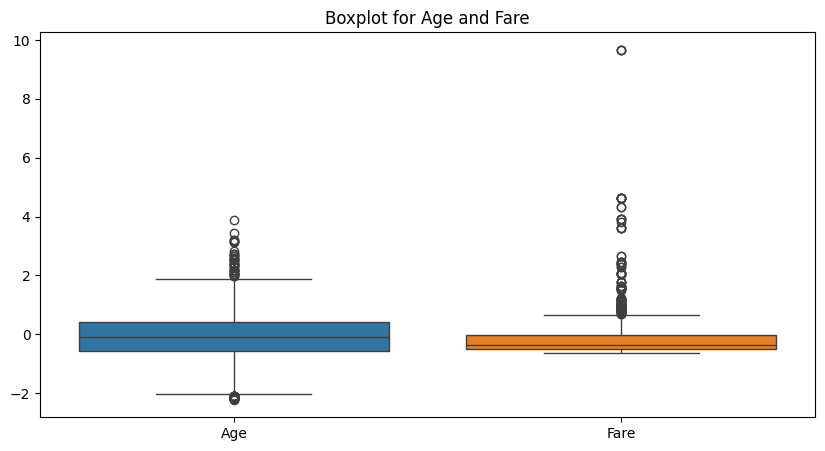

In [19]:
# Boxplot for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['Age', 'Fare']])
plt.title("Boxplot for Age and Fare")
plt.show()

In [20]:
# Display clean dataset info
print("\n=== Cleaned Dataset Info ===")
print(data.info())


=== Cleaned Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Name        891 non-null    object 
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Ticket      891 non-null    object 
 7   Fare        891 non-null    float64
 8   Survived    891 non-null    int64  
 9   Embarked_Q  891 non-null    bool   
 10  Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(2)
memory usage: 64.5+ KB
None


In [21]:
print("\n=== Value Counts Summary ===")
for i in data.columns:
    print(f"Column: {i}")
    if data[i].nunique() < 20:
        print("Value counts:\n", data[i].value_counts())
    else:
        print(f"Unique values: {data[i].nunique()} (Too many to display)")
    print("===================================\n")


=== Value Counts Summary ===
Column: Pclass
Value counts:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Column: Name
Unique values: 891 (Too many to display)

Column: Sex
Value counts:
 Sex
0    577
1    314
Name: count, dtype: int64

Column: Age
Unique values: 88 (Too many to display)

Column: SibSp
Value counts:
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Column: Parch
Value counts:
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Column: Ticket
Unique values: 681 (Too many to display)

Column: Fare
Unique values: 248 (Too many to display)

Column: Survived
Value counts:
 Survived
0    549
1    342
Name: count, dtype: int64

Column: Embarked_Q
Value counts:
 Embarked_Q
False    814
True      77
Name: count, dtype: int64

Column: Embarked_S
Value counts:
 Embarked_S
True     646
False    245
Name: count, dtype: int64

